In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import util

# Data preprocessing

In [2]:
qqq = pd.read_csv('./data/QQQ.csv')
tqqq = pd.read_csv('./data/TQQQ.csv')
qld = pd.read_csv('./data/QLD.csv')

In [3]:
price = {}
ret = {}

In [4]:
qqq = qqq[['Date', 'Adj Close']]
qqq.columns = ['Date', 'price']
qqq = qqq.set_index('Date')
qqq.index = pd.to_datetime(qqq.index)

tqqq = tqqq[['Date', 'Adj Close']]
tqqq.columns = ['Date', 'price']
tqqq = tqqq.set_index('Date')
tqqq.index = pd.to_datetime(tqqq.index)

qld = qld[['Date', 'Adj Close']]
qld.columns = ['Date', 'price']
qld = qld.set_index('Date')
qld.index = pd.to_datetime(qld.index)

In [5]:
price['qqq'] = qqq['price']
price['tqqq'] = tqqq['price']
price['qld'] = qld['price']

In [6]:
tickers = ['qqq', 'tqqq', 'qld']

In [7]:
for ticker in tickers:
    ret[ticker] = np.log(price[ticker]/price[ticker].shift(1)) #(price[ticker] - price[ticker].shift(1)) / price[ticker].shift(1)
    ret[ticker] = ret[ticker].iloc[1:]

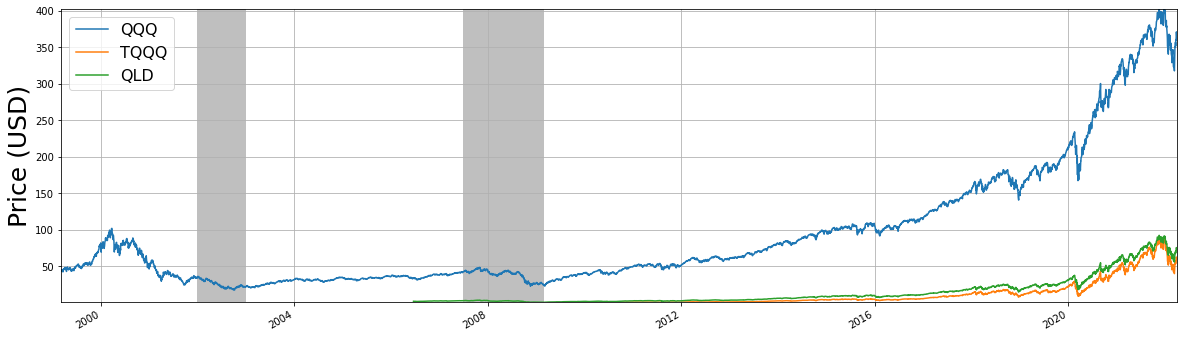

In [8]:
plt.rcParams['axes.grid'] = True 
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(price['qqq'], label="QQQ")
ax.plot(price['tqqq'], label="TQQQ")
ax.plot(price['qld'], label="QLD")

ax.legend(loc='upper left')
fig.autofmt_xdate()
ax.autoscale_view()
ax.margins(0,0)
ax.set_ylabel('Price (USD)', fontsize=25)

plt.axvspan('2002-01', '2003-01', facecolor='grey', alpha=0.5)
plt.axvspan('2007-07', '2009-03', facecolor='grey', alpha=0.5)
plt.legend(fontsize=16, loc='upper left')
plt.show()
plt.close()

In [9]:
from_ = '2010-02-12'

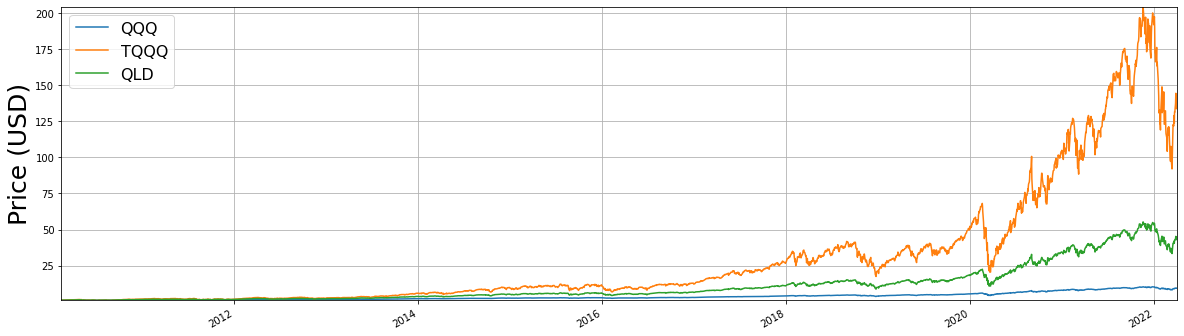

In [10]:
# price scaling starts from 1 USD

plt.rcParams['axes.grid'] = True 
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(price['qqq'].loc[from_:] / price['qqq'].loc[from_:].iloc[0], label="QQQ")
ax.plot(price['tqqq'].loc[from_:] / price['tqqq'].loc[from_:].iloc[0], label="TQQQ")
ax.plot(price['qld'].loc[from_:] / price['qld'].loc[from_:].iloc[0], label="QLD")

ax.legend(loc='upper left')
fig.autofmt_xdate()
ax.autoscale_view()
ax.margins(0,0)
ax.set_ylabel('Price (USD)', fontsize=25)

plt.legend(fontsize=16, loc='upper left')
plt.show()
plt.close()

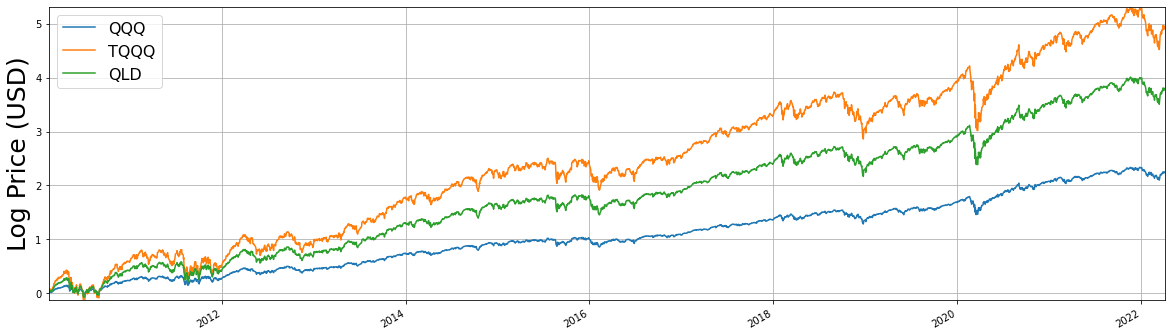

In [11]:
plt.rcParams['axes.grid'] = True 
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(np.log(price['qqq'].loc[from_:] / price['qqq'].loc[from_:].iloc[0]), label="QQQ")
ax.plot(np.log(price['tqqq'].loc[from_:] / price['tqqq'].loc[from_:].iloc[0]), label="TQQQ")
ax.plot(np.log(price['qld'].loc[from_:] / price['qld'].loc[from_:].iloc[0]), label="QLD")

ax.legend(loc='upper left')
fig.autofmt_xdate()
ax.autoscale_view()
ax.margins(0,0)
ax.set_ylabel('Log Price (USD)', fontsize=25)

plt.legend(fontsize=16, loc='upper left')
plt.show()
plt.close()

# Summary Statistics

In [12]:
win = 252

In [13]:

avg = [np.round(ret[ticker].mean(),4) * win for ticker in tickers]
std = [np.round(ret[ticker].std() * np.sqrt(win),3) for ticker in tickers]
skew = [np.round(ret[ticker].skew(),4) for ticker in tickers]
kurto = [np.round(ret[ticker].kurtosis(),3) for ticker in tickers]

stat = pd.DataFrame({'Avg Ret.':avg, 'Std.':std, 'Skewness':skew, 'Kurtosis':kurto}, index=tickers)

In [14]:
# different starting point
stat

,Avg Ret.,Std.,Skewness,Kurtosis
qqq,0.1008,0.276,-0.0004,6.556
tqqq,0.4032,0.594,-1.0208,10.448
qld,0.2268,0.437,-0.6336,9.375


In [15]:

avg = [np.round(ret[ticker].loc[from_:].mean(),4) * win for ticker in tickers]
std = [np.round(ret[ticker].loc[from_:].std() * np.sqrt(win),3) for ticker in tickers]
skew = [np.round(ret[ticker].loc[from_:].skew(),4) for ticker in tickers]
kurto = [np.round(ret[ticker].loc[from_:].kurtosis(),3) for ticker in tickers]

stat = pd.DataFrame({'Avg Ret.':avg, 'Std.':std, 'Skewness':skew, 'Kurtosis':kurto}, index=tickers)

In [16]:
# same starting point
stat

,Avg Ret.,Std.,Skewness,Kurtosis
qqq,0.1764,0.199,-0.6136,8.415
tqqq,0.4032,0.594,-1.0208,10.448
qld,0.3024,0.398,-0.8362,10.077


# Backtest

In [17]:
# Dollar Cost Average Effect = 적립식 투자 효과
# DCA

# lump-sum approach
# LSA

tickers_ = ['qqq_LSA', 'tqqq_LSA', 'qld_LSA', 'qqq_DCA', 'tqqq_DCA', 'qld_DCA']


In [18]:
cash = 10000
rebal = 22
rf = 0.015

In [19]:
price_ = {}

price_['qqq_LSA'] = util.backtest(ret['qqq'], util.discounted_sum(100, int(len(ret['qqq']) / 22), 0.015/12), len(ret['qqq']))
price_['tqqq_LSA'] = util.backtest(ret['tqqq'], util.discounted_sum(100, int(len(ret['tqqq']) / 22), 0.015/12), len(ret['tqqq']))
price_['qld_LSA'] = util.backtest(ret['qld'], util.discounted_sum(100, int(len(ret['qld']) / 22), 0.015/12), len(ret['qld']))
price_['qqq_DCA'] = util.backtest(ret['qqq'], 100, rebal)
price_['tqqq_DCA'] = util.backtest(ret['tqqq'], 100, rebal)
price_['qld_DCA'] = util.backtest(ret['qld'], 100, rebal)


## Different period

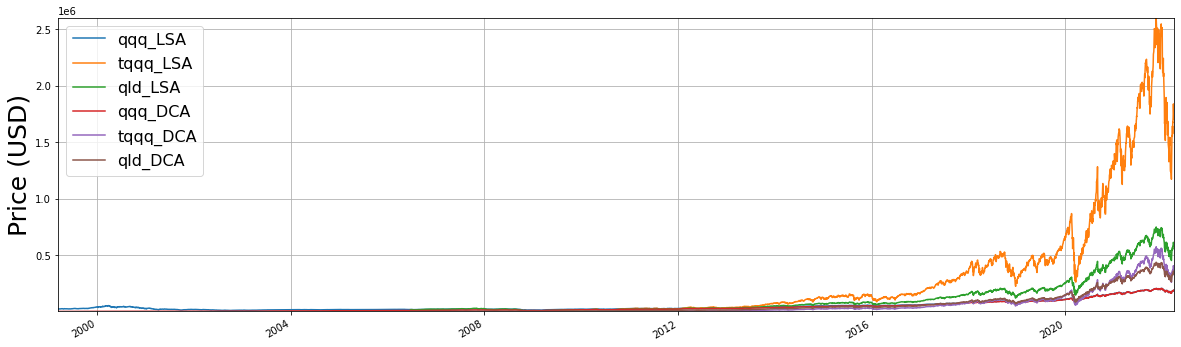

In [20]:
plt.rcParams['axes.grid'] = True 
fig, ax = plt.subplots(figsize=(20,6))


for ticker in tickers_:
    ax.plot(price_[ticker], label=ticker)

ax.legend(loc='upper left')
fig.autofmt_xdate()
ax.autoscale_view()
ax.margins(0,0)
ax.set_ylabel('Price (USD)', fontsize=25)

plt.legend(fontsize=16, loc='upper left')
plt.show()
plt.close()

In [21]:
ret_ = {}

for ticker in tickers_:
    ret_[ticker] = np.log(price_[ticker] / price_[ticker].shift(1))
    ret_[ticker] = ret_[ticker].iloc[1:]

In [22]:

avg = {}
std = {}
skew = {}
kurto = {}
SR = {}
ASR = {}
MDD = {}
AvDD = {}
VaR = {}
ES = {}
Omega = {}
CEQ = {}


for ticker in tickers_:
    avg[ticker] = np.round(ret_[ticker].mean() * win,3)
    std[ticker] = np.round(ret_[ticker].std() * np.sqrt(win),3)
    skew[ticker] = np.round(ret_[ticker].skew(),3)
    kurto[ticker] = np.round(ret_[ticker].kurtosis(),2)
    SR[ticker] = np.round((avg[ticker] - rf) / std[ticker],3)
    ASR[ticker] = np.round(SR[ticker] * (1+skew[ticker]/6*SR[ticker]-(kurto[ticker]-3)/24*SR[ticker]**2),3)
    MDD[ticker] = np.round(util.MDD(price_[ticker]),3)
    AvDD[ticker] = np.round(util.AvDD(price_[ticker]),3)
    VaR[ticker] = np.round(util.VaR(ret_[ticker], 5, 'D'),2)
    ES[ticker] = np.round(util.ES(ret_[ticker], 5, 'D'),2)
    Omega[ticker] = np.round(util.Omega(ret_[ticker], rf, 'D'),2)
    CEQ[ticker] = np.round(avg[ticker] - (std[ticker]**2) / 2,3)
    

In [23]:
pd.DataFrame({'Avg':avg, 'Std.':std, 'Skew.':skew, 'Kurto.':kurto,
              'Sharpe Ratio':SR, 'Adjusted Sharpe Ratio':ASR,
             'Maximum Drawdown':MDD, 'Average Drawdown':AvDD,
              'Value at Risk, 5% level':VaR, 'Expected Shortfall, 5% level':ES,
             'Omega Ratio':Omega, 'Certainty Equivalent Return':CEQ})

,Avg,Std.,Skew.,Kurto.,Sharpe Ratio,Adjusted Sharpe Ratio,Maximum Drawdown,Average Drawdown,"Value at Risk, 5% level","Expected Shortfall, 5% level",Omega Ratio,Certainty Equivalent Return
qqq_LSA,0.092,0.276,-0.000,6.56,0.279,0.276,-0.702,-0.104,-7.10,-10.73,0.91,0.054
tqqq_LSA,0.409,0.594,-1.021,10.44,0.663,0.498,-0.699,-0.121,-15.33,-23.95,1.06,0.233
qld_LSA,0.232,0.437,-0.634,9.38,0.497,0.438,-0.802,-0.120,-11.24,-17.39,1.00,0.137
qqq_DCA,0.327,0.341,6.556,163.42,0.915,-3.291,-0.541,-0.062,-7.03,-10.65,1.06,0.269
tqqq_DCA,0.683,0.639,0.598,24.11,1.045,0.150,-0.699,-0.101,-15.28,-23.75,1.15,0.479
qld_DCA,0.520,0.512,3.928,94.62,0.986,-2.037,-0.706,-0.087,-11.09,-17.31,1.12,0.389


## Same period

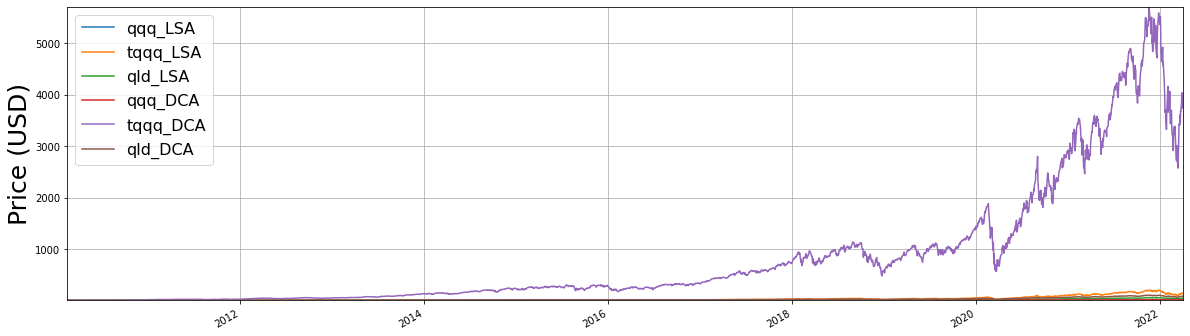

In [24]:
plt.rcParams['axes.grid'] = True 
fig, ax = plt.subplots(figsize=(20,6))


for ticker in tickers_:
    ax.plot(price_[ticker].loc[from_:] / price_[ticker].loc[from_:].iloc[0], label=ticker)

ax.legend(loc='upper left')
fig.autofmt_xdate()
ax.autoscale_view()
ax.margins(0,0)
ax.set_ylabel('Price (USD)', fontsize=25)

plt.legend(fontsize=16, loc='upper left')
plt.show()
plt.close()

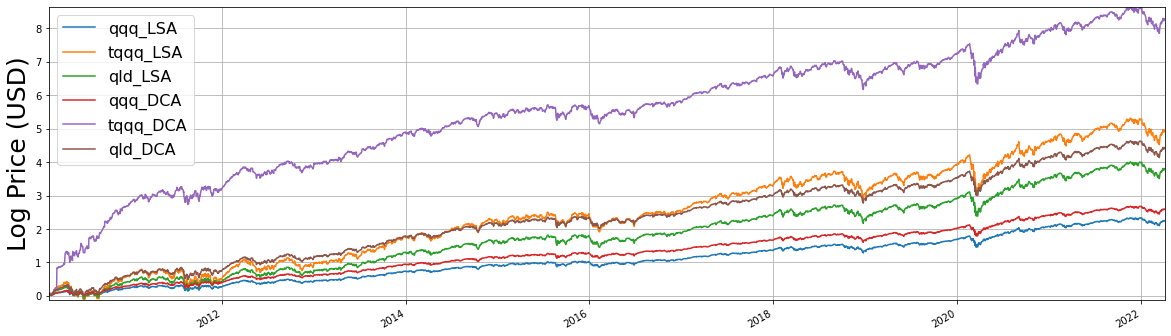

In [25]:
plt.rcParams['axes.grid'] = True 
fig, ax = plt.subplots(figsize=(20,6))


for ticker in tickers_:
    ax.plot(np.log(price_[ticker].loc[from_:] / price_[ticker].loc[from_:].iloc[0]), label=ticker)

ax.legend(loc='upper left')
fig.autofmt_xdate()
ax.autoscale_view()
ax.margins(0,0)
ax.set_ylabel('Log Price (USD)', fontsize=25)

plt.legend(fontsize=16, loc='upper left')
plt.show()
plt.close()

In [26]:
ret_ = {}

for ticker in tickers_:
    ret_[ticker] = np.log(price_[ticker].loc[from_:] / price_[ticker].loc[from_:].shift(1))
    ret_[ticker] = ret_[ticker].iloc[1:]

In [27]:

avg = {}
std = {}
skew = {}
kurto = {}
SR = {}
ASR = {}
MDD = {}
AvDD = {}
VaR = {}
ES = {}
Omega = {}
CEQ = {}


for ticker in tickers_:
    avg[ticker] = np.round(ret_[ticker].mean() * win,3)
    std[ticker] = np.round(ret_[ticker].std() * np.sqrt(win),3)
    skew[ticker] = np.round(ret_[ticker].skew(),3)
    kurto[ticker] = np.round(ret_[ticker].kurtosis(),2)
    SR[ticker] = np.round((avg[ticker] - rf) / std[ticker],3)
    ASR[ticker] = np.round(SR[ticker] * (1+skew[ticker]/6*SR[ticker]-(kurto[ticker]-3)/24*SR[ticker]**2),3)
    MDD[ticker] = np.round(util.MDD(price_[ticker]),3)
    AvDD[ticker] = np.round(util.AvDD(price_[ticker]),3)
    VaR[ticker] = np.round(util.VaR(ret_[ticker], 5, 'D'),2)
    ES[ticker] = np.round(util.ES(ret_[ticker], 5, 'D'),2)
    Omega[ticker] = np.round(util.Omega(ret_[ticker], rf, 'D'),2)
    CEQ[ticker] = np.round(avg[ticker] - (std[ticker]**2) / 2,3)
    

In [28]:
pd.DataFrame({'Avg':avg, 'Std.':std, 'Skew.':skew, 'Kurto.':kurto,
              'Sharpe Ratio':SR, 'Adjusted Sharpe Ratio':ASR,
             'Maximum Drawdown':MDD, 'Average Drawdown':AvDD,
              'Value at Risk, 5% level':VaR, 'Expected Shortfall, 5% level':ES,
             'Omega Ratio':Omega, 'Certainty Equivalent Return':CEQ})

,Avg,Std.,Skew.,Kurto.,Sharpe Ratio,Adjusted Sharpe Ratio,Maximum Drawdown,Average Drawdown,"Value at Risk, 5% level","Expected Shortfall, 5% level",Omega Ratio,Certainty Equivalent Return
qqq_LSA,0.185,0.199,-0.613,8.41,0.854,0.639,-0.702,-0.104,-5.06,-7.77,0.95,0.165
tqqq_LSA,0.409,0.594,-1.021,10.44,0.663,0.498,-0.699,-0.121,-15.33,-23.95,1.06,0.233
qld_LSA,0.313,0.398,-0.836,10.07,0.749,0.547,-0.802,-0.120,-10.26,-15.84,1.04,0.234
qqq_DCA,0.214,0.199,-0.607,8.39,1.000,0.674,-0.541,-0.062,-5.02,-7.75,0.98,0.194
tqqq_DCA,0.683,0.639,0.598,24.11,1.045,0.150,-0.699,-0.101,-15.28,-23.75,1.15,0.479
qld_DCA,0.365,0.399,-0.833,10.10,0.877,0.571,-0.706,-0.087,-10.26,-15.80,1.06,0.285
